## TS8

### Parte 1

Para el siguiente circuito:

![circuito_consigna](img/circuito_consigna.JPG)

**Análisis de cuadripolos**

1. Obtener la transferencia de tensión $\frac{V_o}{V_i}$ por método de cuadripolos (se sugiere referirse a alguno de los métodos de interconexión ya vistos). **Ayuda**: si $C2=\frac{4}{3}$ (se utilizó 1.333 para la simulación), los polos de la transferencia están ubicados sobre una circunferencia de radio unitario.
2. Valide la transferencia con simulación circuital.

**Análisis matricial**

1. Construya la matriz de admitancia indefinida (MAI) del circuito.
1. Compute la transferencia de tensión con la MAI.

## Resolución - Parte 1

**Análisis de cuadripolos**

Partiendo del circuito propuesto, se puede analizar como la interconexión en cascada de 2 cuadripolos L, donde:
$T_F = T_{CL1} . T_{CL2}$

![cuadripolo_L](img/cuadripolo_L.JPG)

La matriz T del cuadripolo L se puede calcular como:

$T = \begin{bmatrix} A & B \\ C & D \end{bmatrix} = \begin{bmatrix} 1 + Z.Y & Z \\ Y & 1 \end{bmatrix}$

Finalmente:

$T_{CL1} = \begin{bmatrix} 1 + (s.L_1).(s.C_2) & s.L_1 \\ s.C_2 & 1 \end{bmatrix} = \begin{bmatrix} 1 + s^2.L_1.C_2 & s.L_1 \\ s.C_2 & 1 \end{bmatrix}$

$T_{CL2} = \begin{bmatrix} 1 + (s.L_3).(\frac{1}{R}) & s.L_3 \\ \frac{1}{R} & 1 \end{bmatrix} = \begin{bmatrix} 1 + s.L_3.G & s.L_3 \\ G & 1 \end{bmatrix}$

$T_F = \begin{bmatrix} 1 + s^2.L_1.C_2 & s.L_1 \\ s.C_2 & 1 \end{bmatrix} . \begin{bmatrix} 1 + s.L_3.G & s.L_3 \\ G & 1 \end{bmatrix}$

El coeficiente que nos interesa para calcular la ganancia de tensión es el coeficiente $A$, el cual se calcula como:

$A = (1 + s^2.L_1.C_2) . (1 + s.L_3.G) + (s.L_1) . (G) = s^3.L_1.L_3.C_2.G + s^2.L_1.C_2 + s.(L_1+L_3).G + 1$

Recordando las ecuaciones de la matriz T:

$V_1 = A . V_2 + B . (-I_2)$

$I_1 = C . V_2 + D . (-I_2)$

Considerando $(-I_2) = 0$:

$A|_{(-I_2)=0}=\frac{V_1}{V_2}$

Por lo tanto, la transferencia queda como:

$A_V = \frac{V_o}{V_i}=\frac{1}{A}$

$A_V = T(s) = \frac{1}{s^3.L_1.L_3.C_2.G + s^2.L_1.C_2 + s.(L_1+L_3).G + 1}$

$T(s) = \frac{\frac{1}{L_1.L_3.C_2.G}}{s^3 + s^2.\frac{L_1.C_2}{L_1.L_3.C_2.G} + s.\frac{(L_1+L_3).G}{L_1.L_3.C_2.G} + \frac{1}{L_1.L_3.C_2.G}}$

$T(s) = \frac{\frac{1}{L_1.L_3.C_2.G}}{s^3 + s^2.\frac{1}{L_3.G} + s.\frac{(L_1+L_3)}{L_1.L_3.C_2} + \frac{1}{L_1.L_3.C_2.G}}$

Considerando:
* $L_1 = \frac{3}{2}$
* $C_2 = \frac{4}{3}$
* $L_3 = \frac{1}{2}$
* $R = 1$

La transferencia queda:

$T(s) = \frac{1}{s^3+s^2.2+s.3+1}$

In [1]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from splane import analyze_sys

num = [1]
den = [1,2,3,1]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

### Simulación Circuital

![circuito_simulado](img/circuito_simulado.JPG)

![transferencia](img/transferencia_mod_y_fase.JPG)


**Análisis matricial**

![circuito_con_nodos](img/circuito_con_nodos.JPG)

Cortocircuitando los puertos 1, 2 y 3, inyectando $I_0$ y midiendo $V_0$

$Y_{00} = \frac{1}{s.L_1}$

Cortocircuitando los puertos 0, 2 y 3, inyectando $I_1$ y midiendo $V_1$

$Y_{11} = \frac{1}{s.L_1} + s.C_2 + \frac{1}{s.L_3}$

Cortocircuitando los puertos 0, 1 y 3, inyectando $I_2$ y midiendo $V_2$

$Y_{22} = \frac{1}{s.L_3} + \frac{1}{R}$

Cortocircuitando los puertos 0, 1 y 2, inyectando $I_3$ y midiendo $V_3$

$Y_{33} = s.C_2 + \frac{1}{R}$

Conociendo los valores de la diagonal principal de la matriz y las propiedades de esta, se puede armar la matriz de admitancia indefinida como:

$Y_{MAI} = \begin{bmatrix} \frac{1}{s.L_1} & -\frac{1}{s.L_1} & 0 & 0 \\ -\frac{1}{s.L_1} & \frac{1}{s.L_1} + s.C_2 + \frac{1}{s.L_3} & -\frac{1}{s.L_3} & -s.C_2 \\ 0 & -\frac{1}{s.L_3} & \frac{1}{s.L_3} + \frac{1}{R} & -\frac{1}{R} \\ 0 & -s.C_2 & -\frac{1}{R} & s.C_2 + \frac{1}{R}\end{bmatrix}$

Para conocer la relación entre $V_o$ y $V_i$, se plantea la ecuación:

${A_V}_{03}^{23} = sig(0-3) . sig(2-3) . \frac{Y_{23}^{03}}{Y_{03}^{03}}$

$Y_{23}^{03} = det(\begin{bmatrix} -\frac{1}{s.L_1} & 0 \\ \frac{1}{s.L_1} + s.C_2 + \frac{1}{s.L_3} & -\frac{1}{s.L_3} \end{bmatrix})$

$Y_{23}^{03} = \frac{1}{s^2.L_1.L_3}$

$Y_{03}^{03} = det(\begin{bmatrix} \frac{1}{s.L_1} + s.C_2 + \frac{1}{s.L_3} & -\frac{1}{s.L_3} \\ -\frac{1}{s.L_3} & \frac{1}{s.L_3} + \frac{1}{R} \end{bmatrix})$

$Y_{03}^{03} = (\frac{1}{s.L_1} + s.C_2 + \frac{1}{s.L_3}) . (\frac{1}{s.L_3} + \frac{1}{R}) - (-\frac{1}{s.L_3}) . (-\frac{1}{s.L_3})$

$Y_{03}^{03} = \frac{1}{s^2.L_1.L_3} + \frac{1}{s.L_1.R} + \frac{C_2}{L_3} + \frac{s.C_2}{R} + \frac{1}{s^2.L_3^2} + \frac{1}{s.L_3.R} - \frac{1}{s^2.L_3^2}$

$Y_{03}^{03} = \frac{1}{s^2.L_1.L_3} + \frac{1}{s.L_1.R} + \frac{C_2}{L_3} + \frac{s.C_2}{R} + \frac{1}{s.L_3.R}$

$Y_{03}^{03} = \frac{1}{s^2.L_1.L_3} . (1+\frac{s^2.L_1.L_3}{s.L_1.R} + \frac{s^2.L_1.L_3.C_2}{L_3} + \frac{s^2.L_1.L_3.s.C_2}{R} + \frac{s^2.L_1.L_3}{s.L_3.R})$

$Y_{03}^{03} = \frac{1}{s^2.L_1.L_3} . (1+\frac{s.L_3}{R} + s^2.L_1.C_2 + \frac{s^3.L_1.L_3.C_2}{R} + \frac{s.L_1}{R})$

$Y_{03}^{03} = \frac{1}{s^2.L_1.L_3} . (\frac{s^3.L_1.L_3.C_2}{R} + s^2.L_1.C_2 + \frac{s.(L_1 + L_3)}{R} + 1)$

${A_V}_{03}^{23} = sig(0-3) . sig(2-3) . \frac{Y_{23}^{03}}{Y_{03}^{03}}$

${A_V}_{03}^{23} = (-1) . (-1) . \frac{Y_{23}^{03}}{Y_{03}^{03}}$

${A_V}_{03}^{23} = \frac{Y_{23}^{03}}{Y_{03}^{03}}$

${A_V}_{03}^{23} = \frac{\frac{1}{s^2.L_1.L_3}}{\frac{1}{s^2.L_1.L_3} . (s^3.\frac{L_1.L_3.C_2}{R} + s^2.L_1.C_2 + s.\frac{(L_1 + L_3)}{R} + 1)}$

${A_V}_{03}^{23} = \frac{1}{s^3.\frac{L_1.L_3.C_2}{R} + s^2.L_1.C_2 + s.\frac{(L_1 + L_3)}{R} + 1}$

${A_V}_{03}^{23} = \frac{\frac{1}{L_1.L_3.C_2.G}}{s^3 + s^2.\frac{L_1.C_2}{L_1.L_3.C_2.G} + s.\frac{(L_1 + L_3).G}{L_1.L_3.C_2.G} + \frac{1}{L_1.L_3.C_2.G}}$

${A_V}_{03}^{23} = \frac{\frac{1}{L_1.L_3.C_2.G}}{s^3 + s^2.\frac{1}{L_3.G} + s.\frac{(L_1 + L_3)}{L_1.L_3.C_2} + \frac{1}{L_1.L_3.C_2.G}}$

Considerando:
* $L_1 = \frac{3}{2}$
* $C_2 = \frac{4}{3}$
* $L_3 = \frac{1}{2}$
* $R = 1$

La transferencia queda:

$T(s) = \frac{1}{s^3+s^2.2+s.3+1}$

Se llega a la misma transferencia que en el método anterior

### Parte 2

Realizar los ejercicios 2 y 3 del TP5 sobre Filtros Digitales.

## Resolución - Parte 2

### TP5 - EJ2

Se desea emular digitalmente la característica de un filtro analógico pasa bajos Butterworth de orden 2, con $f_c = 1 KHz$.

A. Para $f_s = 100 KHz$ y aplicando transformación bilineal, obtener un filtro con respuesta $H(z)$ cuyo comportamiento emule al Butterworth analógico. Trazar la respuesta en frecuencia de módulo y fase de ambos filtros sobre un mismo gráfico para establecer comparaciones.

B. Repetir el punto anterior para $f_s = 10KHz$

C. Repetir los puntos A) y B) si se desea emular digitalmente la característica de un filtro analógico pasa altos Butterworth de orden 2, con $f_c = 6KHz$

D. Indique en cuál de los 3 casos ( A, B ó C ) justificaría rediseñar aplicando prewarping. Explique el motivo en pocas palabras.


A)

Ecuación de la transferencia de un filtro pasa bajos Butterworth de 2do orden:

$T(S) = \frac{1}{S^2+S.\sqrt{2}+1}$

Desnormalizando:

$S=\frac{s}{2\pi.f_c}$

Siendo $f_c = 1KHz$

$T(s) = \frac{1}{(\frac{s}{2\pi.f_c})^2+(\frac{s}{2\pi.f_c}).\sqrt{2}+1}$

$T(s) = \frac{1}{\frac{s^2}{(2\pi.f_c)^2}+\frac{s}{2\pi.f_c}.\sqrt{2}+1}$

$T(s) = \frac{(2\pi.f_c)^2}{s^2+s.\sqrt{2} . 2\pi.f_c+(2\pi.f_c)^2}$

Aplicando la transformada bilineal:

$s = k . \frac{z-1}{z+1}$

Siendo $k = 2.f_s$

$T(z) = \frac{(2\pi.f_c)^2}{(k . \frac{z-1}{z+1})^2+k . \frac{z-1}{z+1} .\sqrt{2} . 2\pi.f_c+(2\pi.f_c)^2}$

$T(z) = \frac{(2\pi.f_c)^2}{\frac{k^2}{(z+1)^2}((z-1)^2+(z-1).(z+1).\frac{\sqrt{2}.2\pi.f_c}{k}+(z+1)^2.(\frac{2\pi.f_c}{k})^2)}$

Renombrando para simplificar:

$C = \frac{2\pi.f_c}{k}$

$T(z) = \frac{(z^2+2.z+1).C^2}{z^2-2.z+1+(z^2-1).\sqrt{2}.C+(z^2+2.z+1).C^2}$

$T(z) = \frac{z^2 .C^2+z.2.C^2+.C^2}{z^2.(1+\sqrt{2}.C+C^2)+z.(2.C^2-2)+(1+C^2-\sqrt{2}.C)}$

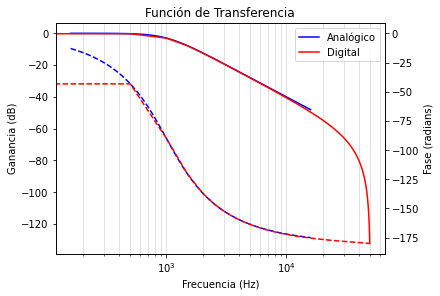

In [1]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from splane import analyze_sys

fig, ax = plt.subplots(constrained_layout=True)

fc = 1000
fs = 100*10**3

k = 2 * fs
C = (2*np.pi*fc)/k
C2 = C**2

analog_num = [(2*np.pi*fc)**2]
analog_den = [1,(np.sqrt(2)*2*np.pi*fc),(2*np.pi*fc)**2]
analog_sys = sig.TransferFunction(analog_num,analog_den)

digital_num = [C2,2*C2,C2]
digital_den = [(1+np.sqrt(2)*C+C2),(2*C2-2),(1+C2-np.sqrt(2)*C)]
digital_sys = sig.TransferFunction(digital_num, digital_den, dt=1/fs)

w_a, mag_a,phase_a = analog_sys.bode()
w_d, mag_d,phase_d = sig.dbode(digital_sys)

ax.semilogx(w_a/(2*np.pi), mag_a,color='b',label='Analógico')
ax.semilogx(w_d/(2*np.pi), mag_d,color='r',label='Digital')

ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')

plt.legend()

ax2 = ax.twinx()

ax2.semilogx(w_a/(2*np.pi), phase_a,color='b',linestyle='dashed')
ax2.semilogx(w_d/(2*np.pi), phase_d,color='r',linestyle='dashed')
ax2.set_ylabel('Fase (radians)')
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')


B) Considerando ahora $f_s = 10KHz$

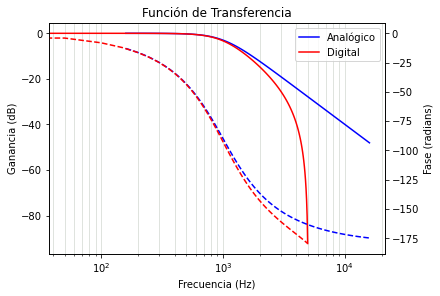

In [2]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from splane import analyze_sys

fig, ax = plt.subplots(constrained_layout=True)

fc = 1000
fs = 10*10**3

k = 2 * fs
C = (2*np.pi*fc)/k
C2 = C**2

analog_num = [(2*np.pi*fc)**2]
analog_den = [1,(np.sqrt(2)*2*np.pi*fc),(2*np.pi*fc)**2]
analog_sys = sig.TransferFunction(analog_num,analog_den)

digital_num = [C2,2*C2,C2]
digital_den = [(1+np.sqrt(2)*C+C2),(2*C2-2),(1+C2-np.sqrt(2)*C)]
digital_sys = sig.TransferFunction(digital_num, digital_den, dt=1/fs)

w_a, mag_a,phase_a = analog_sys.bode()
w_d, mag_d,phase_d = sig.dbode(digital_sys)

ax.semilogx(w_a/(2*np.pi), mag_a,color='b',label='Analógico')
ax.semilogx(w_d/(2*np.pi), mag_d,color='r',label='Digital')

ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')

plt.legend()

ax2 = ax.twinx()

ax2.semilogx(w_a/(2*np.pi), phase_a,color='b',linestyle='dashed')
ax2.semilogx(w_d/(2*np.pi), phase_d,color='r',linestyle='dashed')
ax2.set_ylabel('Fase (radians)')
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')

C)

Ecuación de la transferencia de un filtro pasa altos Butterworth de 2do orden:

$T(S) = \frac{S^2}{S^2+S.\sqrt{2}+1}$

Desnormalizando:

$S=\frac{s}{2\pi.f_c}$

Siendo $f_c = 6KHz$

$T(s) = \frac{\frac{s^2}{(2\pi.f_c)^2}}{\frac{s^2}{(2\pi.f_c)^2}+\frac{s}{2\pi.f_c}.\sqrt{2}+1}$

$T(s) = \frac{s^2}{s^2+s.\sqrt{2}.2\pi.f_c+(2\pi.f_c)^2}$

Aplicando la transformada bilineal:

$s = k . \frac{z-1}{z+1}$

Siendo $k = 2.f_s$

$T(z) = \frac{k^2.\frac{(z-1)^2}{(z+1)^2}}{k^2.\frac{(z-1)^2}{(z+1)^2}+k.\frac{z-1}{z+1}.\sqrt{2}.2\pi.f_c+(2\pi.f_c)^2}$

$T(z) = \frac{\frac{k^2}{(z+1)^2}.(z-1)^2}{\frac{k^2}{(z+1)^2}.((z-1)^2+(z-1).(z+1).\sqrt{2}.\frac{2\pi.f_c}{k}+(z+1)^2.(\frac{2\pi.f_c}{k})^2)}$

Renombrando para simplificar:

$C = \frac{2\pi.f_c}{k}$

$T(z) = \frac{z^2-2.z+1}{z^2-2.z+1+(z^2-1).\sqrt{2}.C+(z^2+2.z+1).C^2}$

$T(z) = \frac{z^2-2.z+1}{z^2.(1+\sqrt{2}.C+C^2)+z.(2.C^2-2)+(1+C^2-\sqrt{2}.C)}$


c:\Users\ranuc\anaconda3\lib\site-packages\scipy\signal\ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


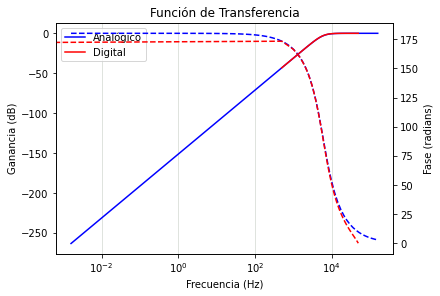

In [3]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from splane import analyze_sys

fig, ax = plt.subplots(constrained_layout=True)

# CASO A: fs = 100KHz
fc = 6000
fs = 100*10**3

k = 2 * fs
C = (2*np.pi*fc)/k
C2 = C**2

analog_num = [1,0,0]
analog_den = [1,(np.sqrt(2)*2*np.pi*fc),(2*np.pi*fc)**2]
analog_sys = sig.TransferFunction(analog_num,analog_den)

digital_num = [1,-2,1]
digital_den = [(1+np.sqrt(2)*C+C2),(2*C2-2),(1+C2-np.sqrt(2)*C)]
digital_sys = sig.TransferFunction(digital_num, digital_den, dt=1/fs)

w_a, mag_a,phase_a = analog_sys.bode()
w_d, mag_d,phase_d = sig.dbode(digital_sys)

ax.semilogx(w_a/(2*np.pi), mag_a,color='b',label='Analógico')
ax.semilogx(w_d/(2*np.pi), mag_d,color='r',label='Digital')

ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')

plt.legend()

ax2 = ax.twinx()

ax2.semilogx(w_a/(2*np.pi), phase_a,color='b',linestyle='dashed')
ax2.semilogx(w_d/(2*np.pi), phase_d,color='r',linestyle='dashed')
ax2.set_ylabel('Fase (radians)')
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')

c:\Users\ranuc\anaconda3\lib\site-packages\scipy\signal\ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


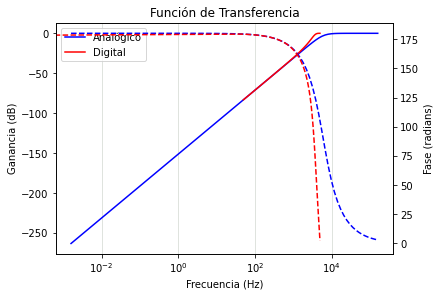

In [4]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from splane import analyze_sys

fig, ax = plt.subplots(constrained_layout=True)

# CASO A: fs = 10KHz
fc = 6000
fs = 10*10**3

k = 2 * fs
C = (2*np.pi*fc)/k
C2 = C**2

analog_num = [1,0,0]
analog_den = [1,(np.sqrt(2)*2*np.pi*fc),(2*np.pi*fc)**2]
analog_sys = sig.TransferFunction(analog_num,analog_den)

digital_num = [1,-2,1]
digital_den = [(1+np.sqrt(2)*C+C2),(2*C2-2),(1+C2-np.sqrt(2)*C)]
digital_sys = sig.TransferFunction(digital_num, digital_den, dt=1/fs)

w_a, mag_a,phase_a = analog_sys.bode()
w_d, mag_d,phase_d = sig.dbode(digital_sys)

ax.semilogx(w_a/(2*np.pi), mag_a,color='b',label='Analógico')
ax.semilogx(w_d/(2*np.pi), mag_d,color='r',label='Digital')

ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')

plt.legend()

ax2 = ax.twinx()

ax2.semilogx(w_a/(2*np.pi), phase_a,color='b',linestyle='dashed')
ax2.semilogx(w_d/(2*np.pi), phase_d,color='r',linestyle='dashed')
ax2.set_ylabel('Fase (radians)')
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')

D) De los 4 casos, conviene aplicar prewarping en el último ya que en este se nota una deformación apreciable en cerca de la frecuencia de corte mientras que, en los que se muestrea a 100KHz casi no se aprecia deformación y en el pasabajos muestreado a 10KHz la deformación se produce lejos de la frecuencia de corte.

### TP5 - EJ3

Dadas las siguientes respuestas al impulso se pide:

* Transferencia del sistema $H(z)$.
* Singularidades en el plano $Z$.
* Respuesta de módulo y fase.

A) **Filtro de media movil** *(moving average)*

$h_1(k) = (1,1)$

Es decir:
- $h_1(0) = 1$
- $h_1(1) = 1$

$h_2(k) = (1,1,1)$

Es decir:
- $h_2(0) = 1$
- $h_2(1) = 1$
- $h_2(2) = 1$

1. ¿Qué modificación debería implementarse para que la salida representa la media aritmética?
2. Para el último sistema, ¿qué frecuencia de muestreo se debería adoptar si se quisiera eliminar con dicho filtro la interferencia causada por la frecuencia de línea de 50 Hz?

B) **Filtro diferenciador**

$h_1(k) = (1,-1)$

Es decir:
- $h_1(0) = 1$
- $h_1(1) = -1$

$h_2(k) = (1,0,-1)$

Es decir:
- $h_2(0) = 1$
- $h_2(1) = 0$
- $h_2(2) = -1$

1. ¿Qué demora introducen ambos sistemas?
2. Hasta qué frecuencias estos sistemas se comportan como un derivador ideal. Considere una tolerancia admisible del 5% respecto a su respuesta ideal $|H(\Omega)|=\Omega$


### Resolución

Considerando que la transformada $Z$ por definición es:

$H(z) = \Sigma_{n=-\infty}^{\infty} h(n) . z^{-n}$

A) **Filtro media movil**

$H_1(z) = h_1(0) . z^0 + h_1(1) . z^{-1}$

$H_1(z) = 1 + z^{-1}$

$H_1(z) = \frac{z + 1}{z}$


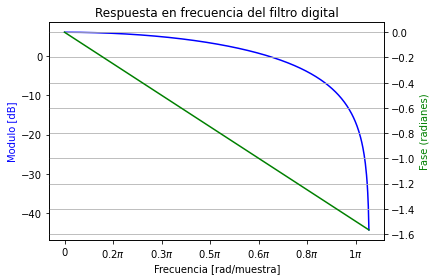

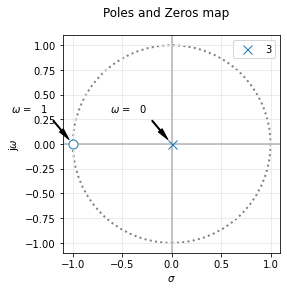

In [5]:
import matplotlib.pyplot as plt
import scipy.signal as sig
from splane import pzmap
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np

num = [1,1]
den = [1,0]
fs = 100*10**3

transfer_f = sig.TransferFunction(num, den, dt=1/fs)

w, h = sig.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Respuesta en frecuencia del filtro digital')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Modulo [dB]', color='b')
ax1.set_xlabel('Frecuencia [rad/muestra]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Fase (radianes)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

filter_names=("  ")

analog_fig_id, analog_axes_hdl = pzmap(transfer_f, filter_names, 3)

$H_2(z)=h_1(0) . z^0 + h_1(1) . z^{-1} + h_1(2) . z^{-2}$

$H_2(z)=1 + z^{-1} + z^{-2}$

$H_2(z) = \frac{z^2 + z + 1}{z^2}$


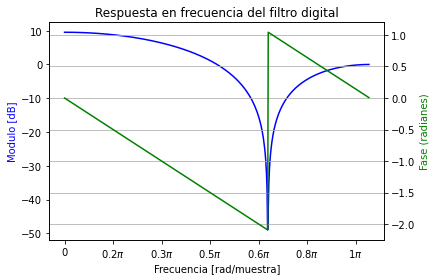

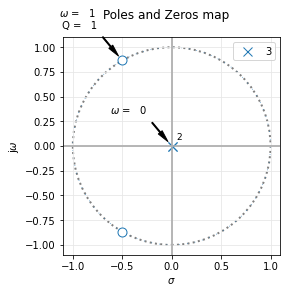

In [6]:
import matplotlib.pyplot as plt
import scipy.signal as sig
from splane import pzmap
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np

num = [1,1,1]
den = [1,0,0]
fs = 100*10**3

transfer_f = sig.TransferFunction(num, den, dt=1/fs)

w, h = sig.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Respuesta en frecuencia del filtro digital')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Modulo [dB]', color='b')
ax1.set_xlabel('Frecuencia [rad/muestra]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Fase (radianes)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

filter_names=("  ")

analog_fig_id, analog_axes_hdl = pzmap(transfer_f, filter_names, 3)

1. Para que la salida represente la media aritmética, debe dividirse por la cantida de muestras.
2. La frecuencia eliminada se corresponde con $\frac{6.\pi}{9}$. Por lo tanto $50Hz$ debe estar sobre esa frecuencia. Considerando que $\frac{f_s}{2}$ se corresponde con $\pi$, se despeja:

$\frac{50Hz . \pi}{\frac{6.\pi}{9}} = \frac{f_s}{2}$

$f_s = \frac{100Hz . 9}{6} = 150Hz$


B) **Filtro diferenciador**

$H_1(z) = h_1(0) . z^0 + h_1(1) . z^{-1}$

$H_1(z) = 1 - z^{-1}$

$H_1(z) = \frac{z - 1}{z}$

C:\Users\ranuc\AppData\Local\Temp/ipykernel_12948/1418138146.py:17: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')


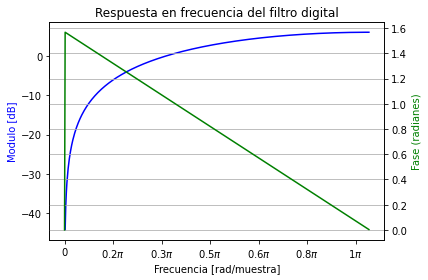

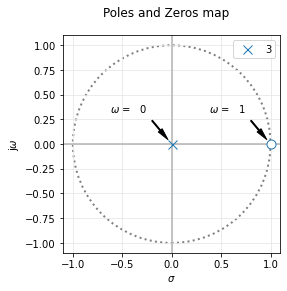

In [7]:
import matplotlib.pyplot as plt
import scipy.signal as sig
from splane import pzmap
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np

num = [1,-1]
den = [1,0]
fs = 100*10**3

transfer_f = sig.TransferFunction(num, den, dt=1/fs)

w, h = sig.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Respuesta en frecuencia del filtro digital')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Modulo [dB]', color='b')
ax1.set_xlabel('Frecuencia [rad/muestra]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Fase (radianes)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

filter_names=("  ")

analog_fig_id, analog_axes_hdl = pzmap(transfer_f, filter_names, 3)

$H_2(z) = h_2(0) . z^0 + h_2(1) . z^{-1} + h_2(2) . z^{-2}$

$H_2(z) = 1 + 0 . z^{-1} - z^{-2}$

$H_2(z) = 1 - z^{-2}$

$H_2(z) = \frac{z^2 - 1}{z^2}$

C:\Users\ranuc\AppData\Local\Temp/ipykernel_12948/2702972711.py:16: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')


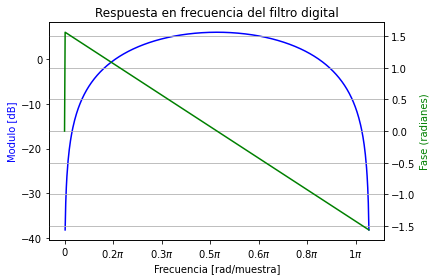

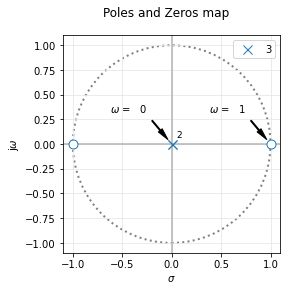

In [8]:
import matplotlib.pyplot as plt
import scipy.signal as sig
from splane import pzmap
from matplotlib.ticker import FuncFormatter, MultipleLocator

num = [1,0,-1]
den = [1,0,0]
fs = 100*10**3

transfer_f = sig.TransferFunction(num, den, dt=1/fs)

w, h = sig.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Respuesta en frecuencia del filtro digital')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Modulo [dB]', color='b')
ax1.set_xlabel('Frecuencia [rad/muestra]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Fase (radianes)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

filter_names=("  ")

analog_fig_id, analog_axes_hdl = pzmap(transfer_f, filter_names, 3)

1. Ambos sistemas introducen una demora correspondiente al orden del sistema. El de orden 1 introduce una demora de una muestra y el de orden 2 una demora de 2 muestras.